In [1]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Using Envelop

In [75]:
file_path = 'outputEnv\EnvData.csv'

# Write arrays to a CSV file
with open(file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([x for x in range(751)])
    for i in range(30):
        df= pd.read_csv('outputEnv\Envelop'+str(i)+'.csv')
        
        relax_row = np.append(df.Relax,0)
        openm_row = np.append(df.OpenMouth,1)
        laugh_row = np.append(df.Laugh,2)
        side_row =  np.append(df.Side,3)
        writer.writerows(np.row_stack((relax_row, openm_row, laugh_row, side_row)))


In [191]:
#reading data from the stored CSV file
EV_data = pd.read_csv('outputEnv\EnvData.csv')
EV_data.head(5)
TAcc_env=[]

In [192]:
for i in range(10):
    X = EV_data.drop(columns='750',axis=1)
    Y = EV_data['750']

    # Train_ev and Test_ev Data
    X_train_ev,X_test_ev,Y_train_ev,Y_test_ev = train_test_split(X,Y , test_size=0.16 ,stratify=Y, random_state=i)

    X_train_ev = X_train_ev.astype('float32')
    X_test_ev = X_test_ev.astype('float32')

    print("# of train_eving data =",X_train_ev.shape[0])
    print("# of test_evdata =",X_test_ev.shape[0])

    model = Sequential()
    model.add(tf.keras.layers.Dense(750, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(750,)))
    model.add(tf.keras.layers.Dense(356, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=0.0005, momentum=0.5)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_ev,Y_train_ev, epochs=500, batch_size=20)


    loss, accuracy = model.evaluate(X_test_ev,Y_test_ev)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    TAcc_env.append([i,loss,accuracy])
    

# of train_eving data = 100
# of test_evdata = 20
Epoch 1/500
5/5 [==============================] - 1s 10ms/step - loss: 7.8141 - accuracy: 0.3200
Epoch 2/500
5/5 [==============================] - 0s 11ms/step - loss: 2.6805 - accuracy: 0.2700
Epoch 3/500
5/5 [==============================] - 0s 11ms/step - loss: 1.1832 - accuracy: 0.5100
Epoch 4/500
5/5 [==============================] - 0s 11ms/step - loss: 1.3734 - accuracy: 0.4900
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 0.8877 - accuracy: 0.6300
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 0.9257 - accuracy: 0.5500
Epoch 7/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7772 - accuracy: 0.6800
Epoch 8/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7320 - accuracy: 0.6900
Epoch 9/500
5/5 [==============================] - 0s 17ms/step - loss: 0.9044 - accuracy: 0.6400
Epoch 10/500
5/5 [==============================] - 0s 13ms/step - los

In [201]:
np.sum(np.array(TAcc_env).T[2])/len(TAcc_env) * 100

84.50000047683716

In [182]:
#print(TF_data['720'].value_counts())

#TF_data.drop(TF_data[TF_data['750'] >= 2].index, inplace = True)
print(EV_data['750'].value_counts())

# Seperating Data and Labels

X = EV_data.drop(columns='750',axis=1)
Y = EV_data['750']

# Train_ev and Test_ev Data
X_train_ev,X_test_ev,Y_train_ev,Y_test_ev = train_test_split(X,Y , test_size=0.16 ,stratify=Y, random_state=1)

X_train_ev = X_train_ev.astype('float32')
X_test_ev = X_test_ev.astype('float32')

print("# of train_eving data =",X_train_ev.shape[0])
print("# of test_evdata =",X_test_ev.shape[0])




0.0    30
1.0    30
2.0    30
3.0    30
Name: 750, dtype: int64
# of train_eving data = 100
# of test_evdata = 20


In [187]:
model = Sequential()
model.add(tf.keras.layers.Dense(750, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(750,)))
model.add(tf.keras.layers.Dense(356, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.0005, momentum=0.5)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_ev,Y_train_ev, epochs=500, batch_size=20)

Epoch 1/500
5/5 [==============================] - 1s 7ms/step - loss: 5.7566 - accuracy: 0.2300
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 3.8262 - accuracy: 0.1500
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 1.6414 - accuracy: 0.3000
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 1.3810 - accuracy: 0.4000
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 1.1519 - accuracy: 0.5700
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 0.8766 - accuracy: 0.6900
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 1.0044 - accuracy: 0.5600
Epoch 8/500
5/5 [==============================] - 0s 9ms/step - loss: 1.0148 - accuracy: 0.6400
Epoch 9/500
5/5 [==============================] - 0s 9ms/step - loss: 0.9659 - accuracy: 0.5600
Epoch 10/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7381 - accuracy: 0.7700
Epoch 11/500
5/5 [========

In [188]:
loss, accuracy = model.evaluate(X_test_ev,Y_test_ev)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 220ms/step - loss: 0.2845 - accuracy: 0.8500
Test Loss: 0.28445228934288025
Test Accuracy: 0.8500000238418579


1/1 [==============================] - 0s 140ms/step
Test_ev Label--------------Predict_eved LAbel---------------
1.0                          1              True
1.0                          1              True
0.0                          0              True
2.0                          2              True
3.0                          3              True
1.0                          1              True
3.0                          3              True
3.0                          3              True
1.0                          1              True
2.0                          2              True
0.0                          2              False
2.0                          2              True
0.0                          0              True


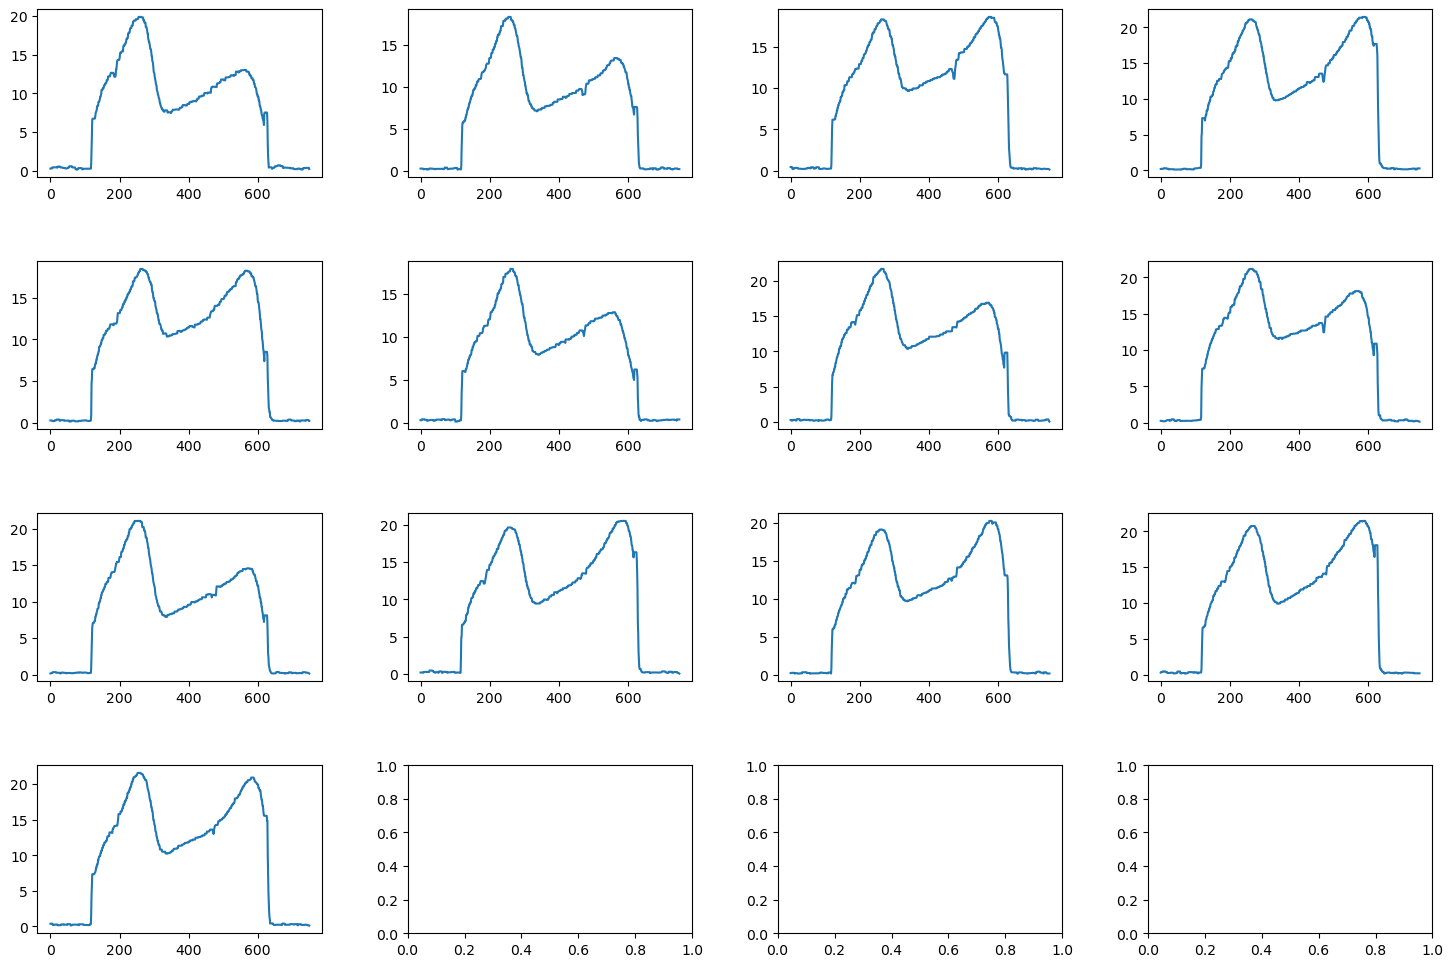

In [35]:
Y_predict_ev = model.predict(X_test_ev)

print ("Test_ev Label--------------Predict_eved LAbel---------------")
for i in range(len(Y_predict_ev)):
    p = np.argmax(Y_predict_ev,axis= 1)[i]
    t = Y_test_ev.iloc[i]
    print(t,"                        ",p,"            ",(int(t)==p))

f = np.arange(750)
fig, axs = plt.subplots(4,4, figsize=(18, 12))
fig.subplots_adjust(hspace = 0.5, wspace=0.3)

axs = axs.ravel()

for i in range(13):

    axs[i].plot(f,X_test_ev.iloc[i])
    # axs[i].set_title(str(Y_predict_ev[i]+str(int(Y_test_ev[i]))))

## Using Transfer Function

In [202]:
# file_path = 'Attemp 2\output\Dat0.csv'

# # Write arrays to a CSV file
# with open(file_path, 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow([x for x in range(720)])
#     for i in range(30,31):
#         df= pd.read_csv('Attemp 2\output\TF'+str(i)+'.csv')
        
#         relax_row = np.append(df.Relax[21:741],0)
#         openm_row = np.append(df.OpenMouth[21:741],1)
#         laugh_row = np.append(df.Laugh[21:741],2)
#         side_row =  np.append(df.Side[21:741],3)
#         writer.writerows(np.row_stack((relax_row, openm_row, laugh_row, side_row)))

In [210]:
#reading data from the stored CSV file
TF_data = pd.read_csv('Attemp 2\output\Data.csv')
TF_data.head(5)
TestAccuracy = []

In [224]:
TF_acc = []
for j in range(11):
    X = TF_data.drop(columns='720',axis=1)
    Y = TF_data['720']

    # Train and Test Data
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.15 ,stratify=Y, random_state=j)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    print("# of training data =",X_train.shape[0])
    print("# of testdata =",X_test.shape[0])

    model = Sequential()
    model.add(tf.keras.layers.Dense(720, activation=tf.keras.layers.LeakyReLU(alpha=0.02), input_shape=(720,)))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(140, activation=tf.keras.layers.LeakyReLU(alpha=0.02)))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    print("Training Run")
    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=0.0007, momentum=0.6)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train,Y_train, epochs=400, batch_size=18)


    print("\n"*5)
    print("Test Run")



    loss, accuracy = model.evaluate(X_test,Y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    TF_acc.append((j,loss,accuracy))

# of training data = 105
# of testdata = 19
Training Run
Epoch 1/400
6/6 [==============================] - 1s 6ms/step - loss: 1.6224 - accuracy: 0.3333
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 1.2683 - accuracy: 0.4476
Epoch 3/400
6/6 [==============================] - 0s 7ms/step - loss: 1.1267 - accuracy: 0.5333
Epoch 4/400
6/6 [==============================] - 0s 7ms/step - loss: 1.0477 - accuracy: 0.6095
Epoch 5/400
6/6 [==============================] - 0s 7ms/step - loss: 0.9760 - accuracy: 0.6762
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 0.9263 - accuracy: 0.6667
Epoch 7/400
6/6 [==============================] - 0s 8ms/step - loss: 0.8830 - accuracy: 0.6952
Epoch 8/400
6/6 [==============================] - 0s 7ms/step - loss: 0.8549 - accuracy: 0.7048
Epoch 9/400
6/6 [==============================] - 0s 7ms/step - loss: 0.8259 - accuracy: 0.7238
Epoch 10/400
6/6 [==============================] - 0s 7ms/step - loss

In [227]:
np.array(TF_acc).T[2]

array([0.89473683, 0.68421054, 0.57894737, 0.7368421 , 0.57894737,
       0.52631581, 0.52631581, 0.68421054, 0.63157892, 0.47368422,
       0.7368421 ])

In [228]:
np.sum(np.array(TF_acc).T[2])/len(TAcc_env) * 100

70.52631586790085

In [207]:



#print(TF_data['720'].value_counts())

#TF_data.drop(TF_data[TF_data['720'] >= 2].index, inplace = True)
print(TF_data['720'].value_counts())

# Seperating Data and Labels

X = TF_data.drop(columns='720',axis=1)
Y = TF_data['720']

# Train and Test Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.15 ,stratify=Y, random_state=3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("# of training data =",X_train.shape[0])
print("# of testdata =",X_test.shape[0])

0    31
1    31
2    31
3    31
Name: 720, dtype: int64
# of training data = 105
# of testdata = 19


In [209]:
model = Sequential()
model.add(tf.keras.layers.Dense(720, activation='relu', input_shape=(720,)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print("Training Run")
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.0008, momentum=0.5)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,Y_train, epochs=500, batch_size=26)


print("\n"*5)
print("Test Run")



loss, accuracy = model.evaluate(X_test,Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

TestAccuracy.append((loss,accuracy))

Training Run
Epoch 1/500
5/5 [==============================] - 1s 11ms/step - loss: 2.1865 - accuracy: 0.2952
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 1.6327 - accuracy: 0.3333
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 1.4114 - accuracy: 0.3143
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2416 - accuracy: 0.4762
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 1.1612 - accuracy: 0.4667
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 1.0144 - accuracy: 0.5810
Epoch 7/500
5/5 [==============================] - 0s 12ms/step - loss: 1.0098 - accuracy: 0.4857
Epoch 8/500
5/5 [==============================] - 0s 11ms/step - loss: 1.0363 - accuracy: 0.5524
Epoch 9/500
5/5 [==============================] - 0s 13ms/step - loss: 0.9347 - accuracy: 0.6762
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9442 - accuracy: 0.6095
Epoch 

In [180]:
np.sum(np.array(TestAccuracy).T[1])/len(TestAccuracy)

0.6041666641831398

In [181]:
Y_predict = model.predict(X_test)

print ("Test Label--------------Predicted LAbel---------------")
for i in range(len(Y_predict)):
    p = np.argmax(Y_predict,axis= 1)[i]
    t = Y_test.iloc[i]
    print(t,"                        ",p,"            ",(int(t)==p))

1/1 [==============================] - 0s 117ms/step
Test Label--------------Predicted LAbel---------------
2                          2              True
0                          0              True
2                          2              True
0                          0              True
0                          0              True
3                          3              True
1                          1              True
3                          3              True
2                          2              True
1                          3              False
3                          1              False
2                          2              True
2                          3              False
3                          3              True
1                          1              True
0                          0              True
0                          0              True
1                          1              True


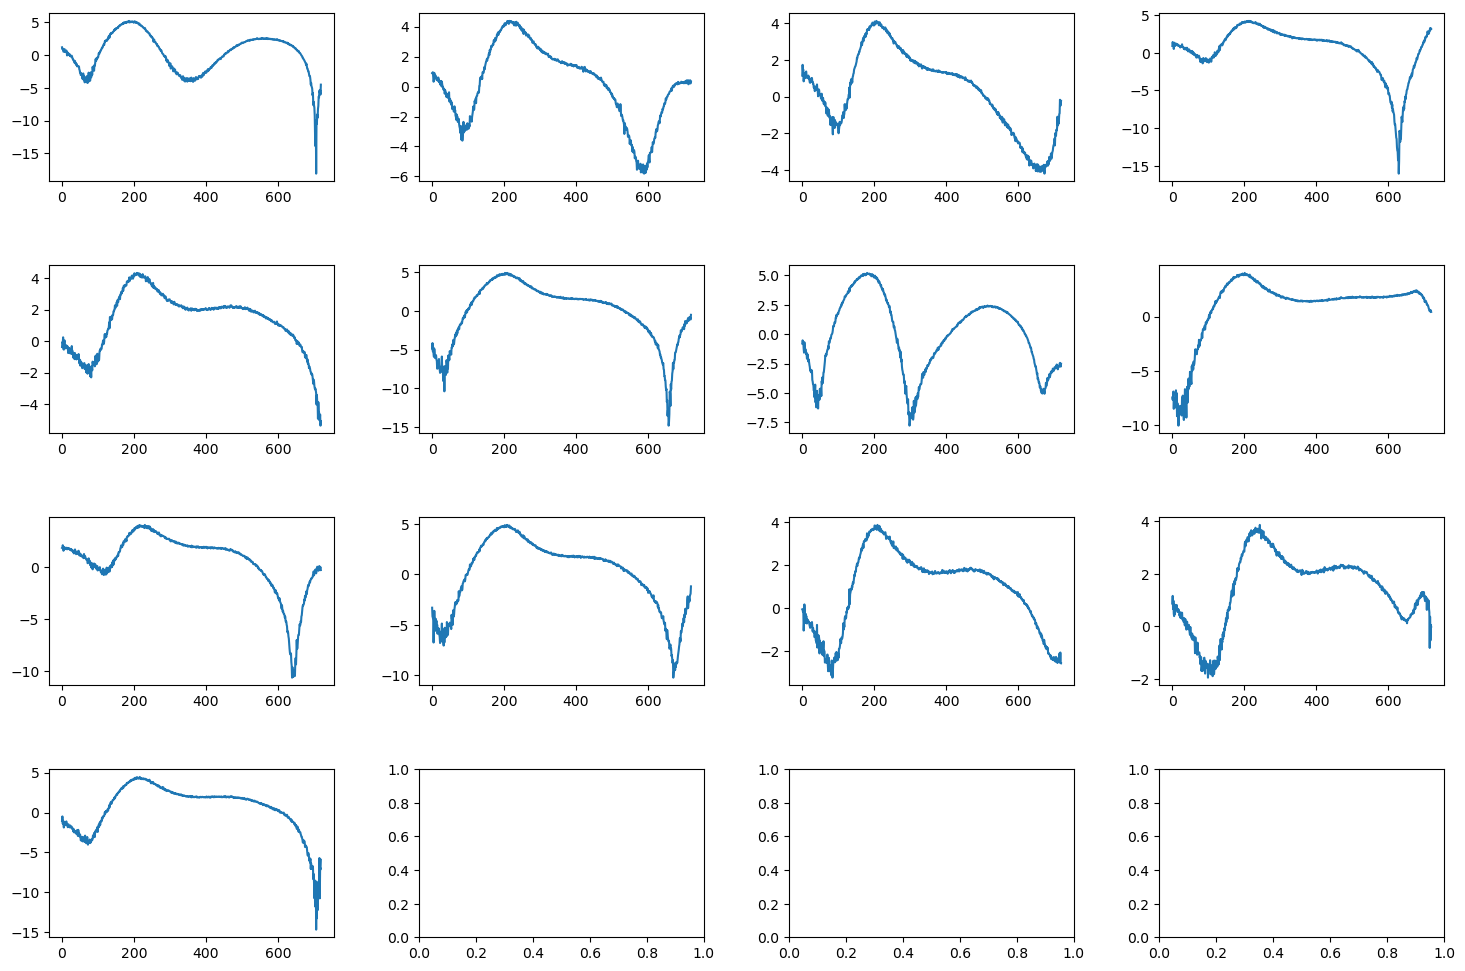

In [70]:
f = np.arange(720)
fig, axs = plt.subplots(4,4, figsize=(18, 12))
fig.subplots_adjust(hspace = 0.5, wspace=0.3)

axs = axs.ravel()

for i in range(13):

    axs[i].plot(f,X_test.iloc[i])
    # axs[i].set_title(str(Y_predict[i]+str(int(Y_test[i]))))